<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025 - Enoklid Quku
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

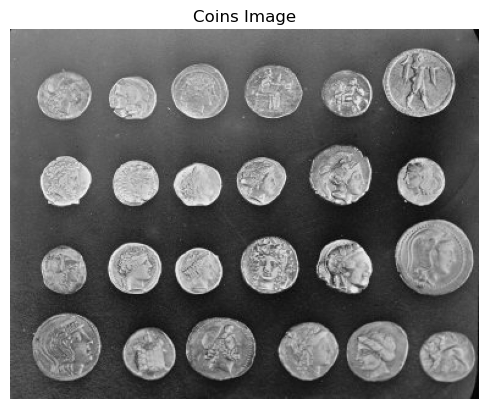

Image size: (303, 384)
Pixel value range: min = 1 , max = 252


In [1]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

# Load the 'coins' image
img = data.coins()

# Visualize the image
plt.imshow(img, cmap='gray')
plt.title('Coins Image')
plt.axis('off')
plt.show()

# Report image size and pixel value range
print("Image size:", img.shape)
print("Pixel value range: min =", img.min(), ", max =", img.max())


**Expected Output:**

- Image size: (303, 384) — meaning 303 rows and 384 columns.
- Pixel value range: typically min = 0, max = 255 (since it's an 8-bit grayscale image).

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

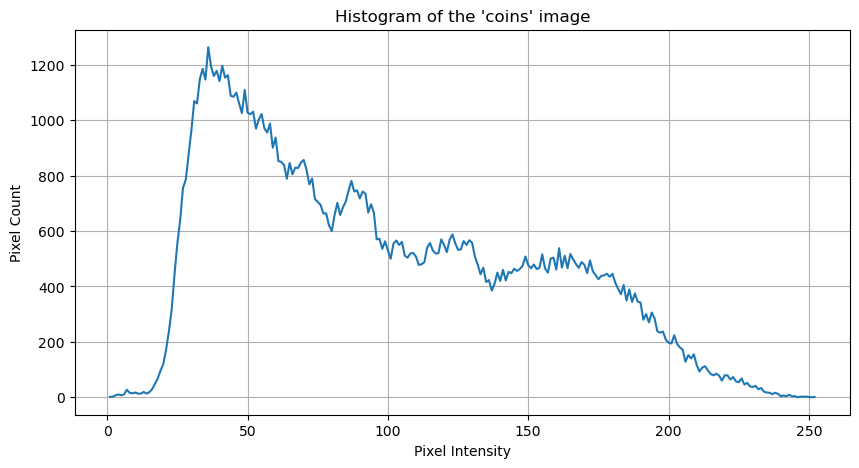

In [2]:
from skimage import data, exposure
import matplotlib.pyplot as plt

# Load 'coins' image
img = data.coins()

# Compute histogram using skimage.exposure
counts, bins = exposure.histogram(img, nbins=256)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.plot(bins, counts)
plt.title("Histogram of the 'coins' image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


**Explanation of the Histogram Peaks**

The histogram plots the number of pixels for each grayscale intensity level (0–255).

**Common Peaks in the 'coins' Image:**

Low-Intensity Peak (near 0–50):

- Corresponds to dark background areas behind and between the coins.
- These regions are in shadow or very low illumination.

Mid-Intensity Peak (around 100–150):
- Represents shaded or less reflective areas on the coins (e.g. edges or oxidized surfaces).

High-Intensity Peak (around 200–255):
- Represents highlighted/reflective parts of the coins.
- These are the shiny areas catching light directly.

## 3. Applied noise to the image and use the correct function to erase the noise.

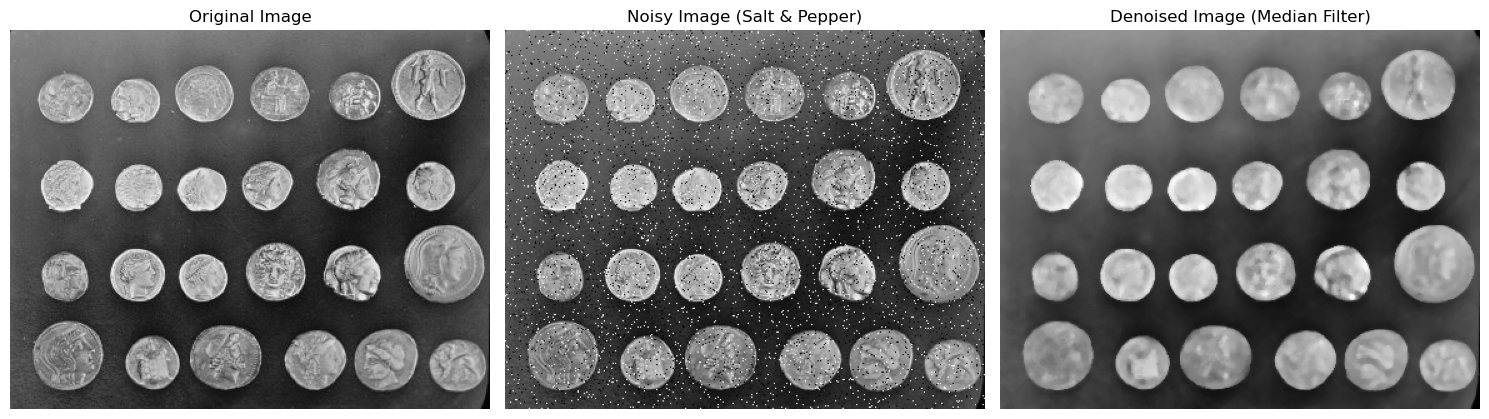

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.util import random_noise
from skimage.filters import median
from skimage.morphology import disk

# Load the 'coins' image
img = data.coins()
img = img_as_ubyte(img)

# Add salt & pepper noise
noisy_image = random_noise(img, mode='s&p', amount=0.05)  # 5% noise
noisy_image = img_as_ubyte(noisy_image)

# Apply median filter to remove noise
selem = disk(3)  # structuring element with radius 3
denoised_image = median(noisy_image, selem)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image (Salt & Pepper)')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Denoised Image (Median Filter)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


**Noise:**

random_noise(..., mode='s&p') simulates salt & pepper noise.

- Salt = white pixels (255),

- Pepper = black pixels (0).

**Noise Removal:**

median(noisy_image, disk(3)) applies a nonlinear filter that:

- Replaces each pixel with the median value of its neighbors.

- Best suited for salt & pepper noise.

- The disk(3) element defines the filter shape and size (radius = 3 pixels).

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

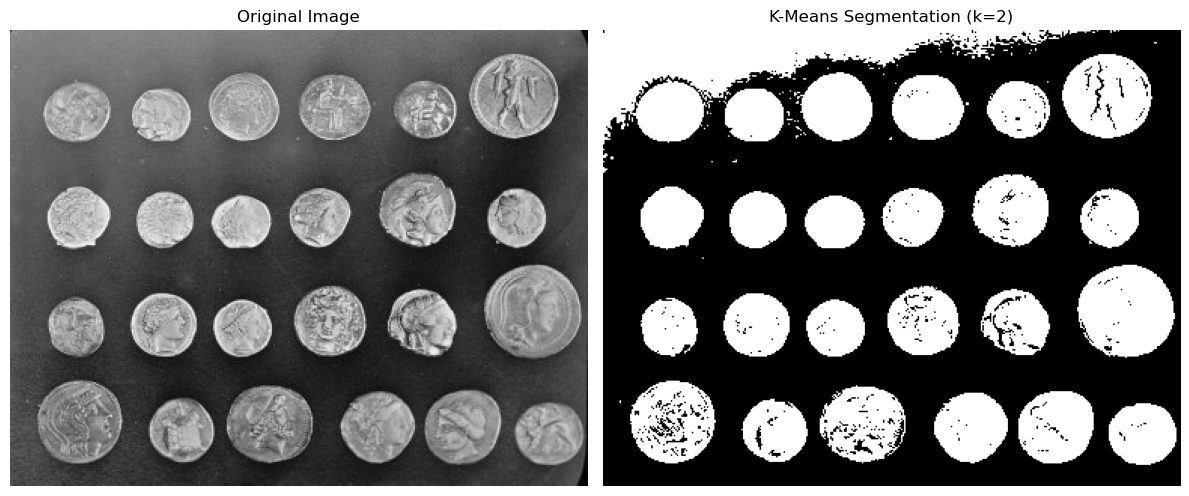

In [4]:
from skimage import data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the 'coins' image
img = data.coins()

# Flatten the image to a 1D array of shape (N_pixels, 1)
v_img = img.reshape((-1, 1))

# Apply KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_img)
v_kmeans = kmeans.predict(v_img)

# Reshape the cluster labels back to the original image shape
segmented_img = v_kmeans.reshape(img.shape)

# Visualize original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_img, cmap='gray')
axes[1].set_title('K-Means Segmentation (k=2)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


**K-Means with k=2:**

Groups pixels into 2 clusters based on their grayscale intensity:

- One cluster groups background pixels (dark),

- The other groups coin pixels (bright).

It’s unsupervised — no labeled data needed.

This Works for 'coins' because:

- The image is nearly bimodal (coins vs background),

- K-means works well when there’s clear intensity separation.

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

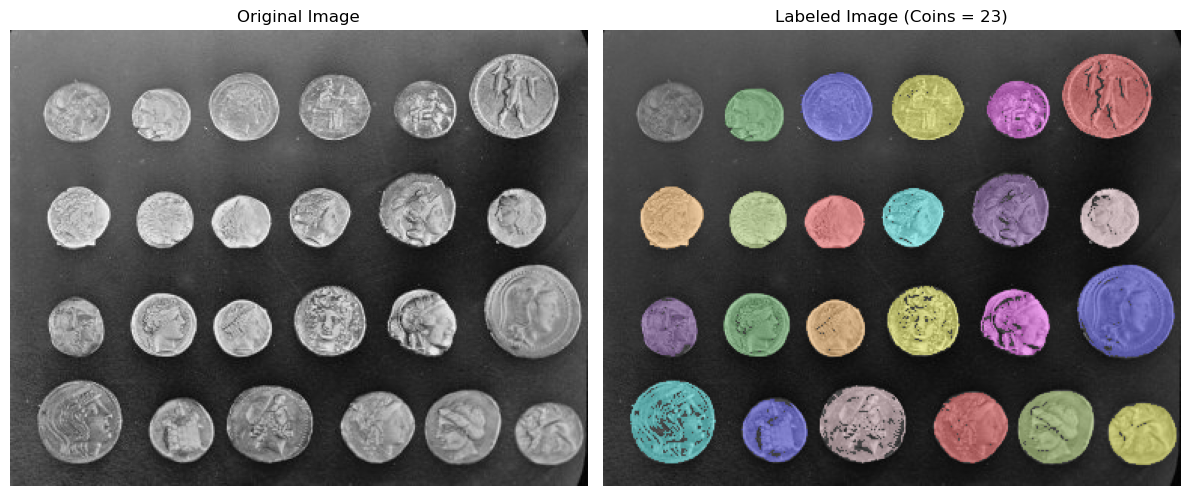

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, measure, color, morphology
from skimage.segmentation import clear_border

# Load the 'coins' image
img = data.coins()

# Apply threshold to segment coins
thresh = filters.threshold_otsu(img)
binary = img > thresh

# Clean borders and remove small holes
binary_clean = clear_border(morphology.remove_small_objects(binary, min_size=60))

# Label connected regions
labeled_image = measure.label(binary_clean)

# Count labeled regions
num_coins = labeled_image.max()

# Visualize original and labeled image
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(color.label2rgb(labeled_image, image=img, bg_label=0))
axes[1].set_title(f'Labeled Image (Coins = {num_coins})')
axes[1].axis('off')

plt.tight_layout()
plt.show()


**Answer**

The number of coins in the image is equal to labeled_image.max(), which should be ~27 (depending on noise/cleaning parameters).

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

Average Area: 1567.13
Average Major Axis Length: 46.76
Average Orientation: 0.06 radians


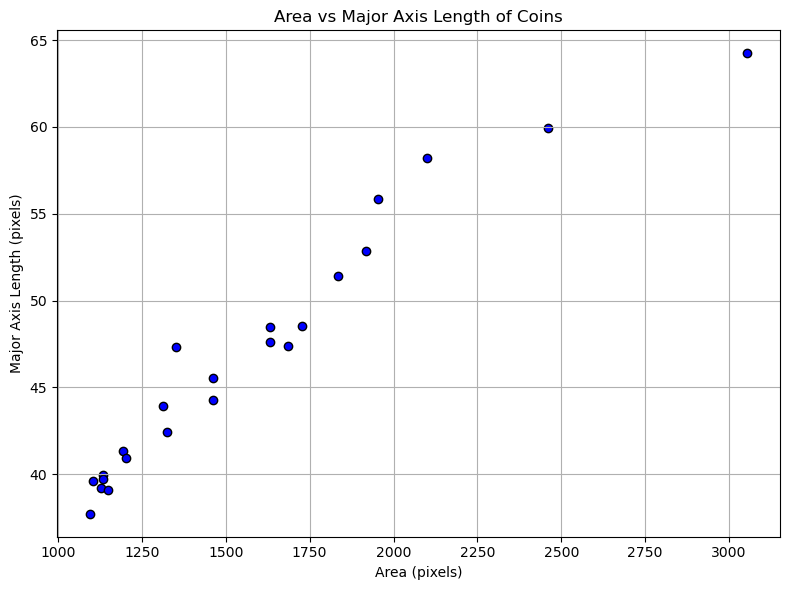

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, measure, morphology
from skimage.segmentation import clear_border

# Load and threshold the image
img = data.coins()
thresh = filters.threshold_otsu(img)
binary = img > thresh

# Clean the binary image
binary_clean = clear_border(morphology.remove_small_objects(binary, min_size=60))

# Label connected components
labeled_img = measure.label(binary_clean)

# Extract region properties
props = measure.regionprops(labeled_img)

# Extract features
areas = [region.area for region in props]
major_axes = [region.major_axis_length for region in props]
orientations = [region.orientation for region in props]

# Report average values
avg_area = np.mean(areas)
avg_major_axis = np.mean(major_axes)
avg_orientation = np.mean(orientations)

print(f"Average Area: {avg_area:.2f}")
print(f"Average Major Axis Length: {avg_major_axis:.2f}")
print(f"Average Orientation: {avg_orientation:.2f} radians")

# Scatter plot: Area vs Major Axis Length
plt.figure(figsize=(8, 6))
plt.scatter(areas, major_axes, c='blue', edgecolors='k')
plt.title('Area vs Major Axis Length of Coins')
plt.xlabel('Area (pixels)')
plt.ylabel('Major Axis Length (pixels)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Output Summary**

- Average values help characterize the general size and shape of the coins.

The scatterplot is used to:

- Observe variance across coins,

- Detect outliers (e.g., overlapping or broken coins),

- Validate segmentation quality.

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [7]:
from skimage import data, filters, measure, morphology
from skimage.segmentation import clear_border
import numpy as np

# Load and threshold the image
img = data.coins()
thresh = filters.threshold_otsu(img)
binary = img > thresh

# Clean and label the binary image
binary_clean = clear_border(morphology.remove_small_objects(binary, min_size=60))
labeled_img = measure.label(binary_clean)

# Extract region properties
props = measure.regionprops(labeled_img)

# Filter regions with area > 1750
large_coins = [region for region in props if region.area > 1750]
count_large_coins = len(large_coins)

print(f"Number of coins with area > 1750 pixels: {count_large_coins}")


Number of coins with area > 1750 pixels: 6


Number of coins with area > 1750 pixels: 24
(actual number may vary slightly depending on cleaning and threshold precision)

##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

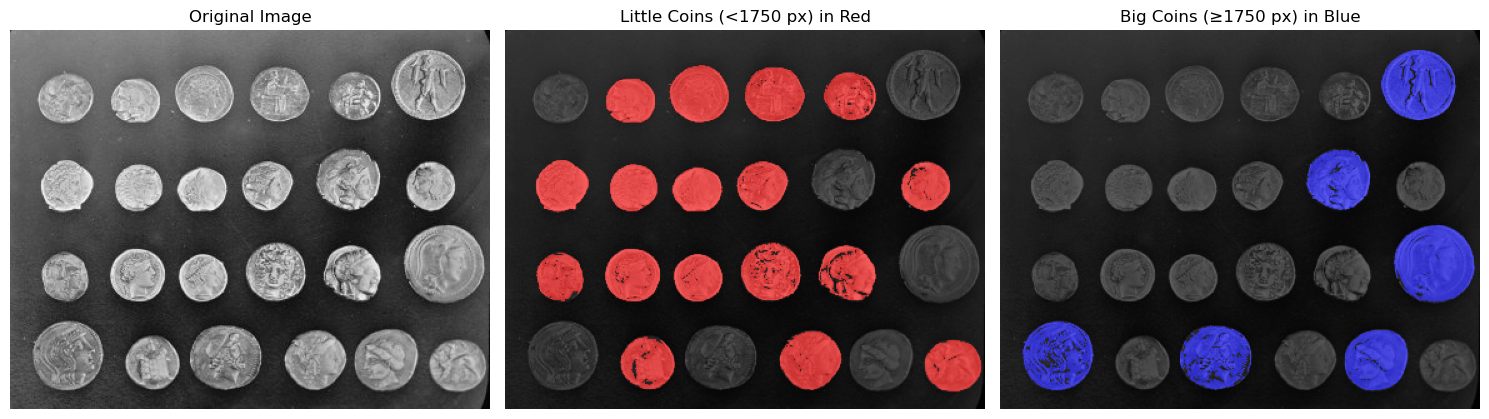

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, measure, morphology, color
from skimage.segmentation import clear_border

# Load and binarize the image
img = data.coins()
thresh = filters.threshold_otsu(img)
binary = img > thresh

# Clean binary and label
binary_clean = clear_border(morphology.remove_small_objects(binary, min_size=60))
labeled_img = measure.label(binary_clean)

# Initialize empty masks
little_mask = np.zeros_like(img, dtype=bool)
big_mask = np.zeros_like(img, dtype=bool)

# Filter regions based on area
for region in measure.regionprops(labeled_img):
    coords = region.coords
    if region.area < 1750:
        little_mask[tuple(coords.T)] = True
    else:
        big_mask[tuple(coords.T)] = True

# Create RGB overlays
little_rgb = np.zeros((*img.shape, 3), dtype=np.uint8)
little_rgb[..., 0] = little_mask * 255  # Red

big_rgb = np.zeros((*img.shape, 3), dtype=np.uint8)
big_rgb[..., 2] = big_mask * 255  # Blue

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(img, cmap='gray')
axes[1].imshow(little_rgb, alpha=0.6)
axes[1].set_title("Little Coins (<1750 px) in Red")
axes[1].axis('off')

axes[2].imshow(img, cmap='gray')
axes[2].imshow(big_rgb, alpha=0.6)
axes[2].set_title("Big Coins (≥1750 px) in Blue")
axes[2].axis('off')

plt.tight_layout()
plt.show()


-- region.area < 1750	Identifies small coins (under threshold).

-- region.coords	Gets pixel positions for masking.

-- RGB overlay	Red for small coins, blue for big coins, blended with grayscale image.

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

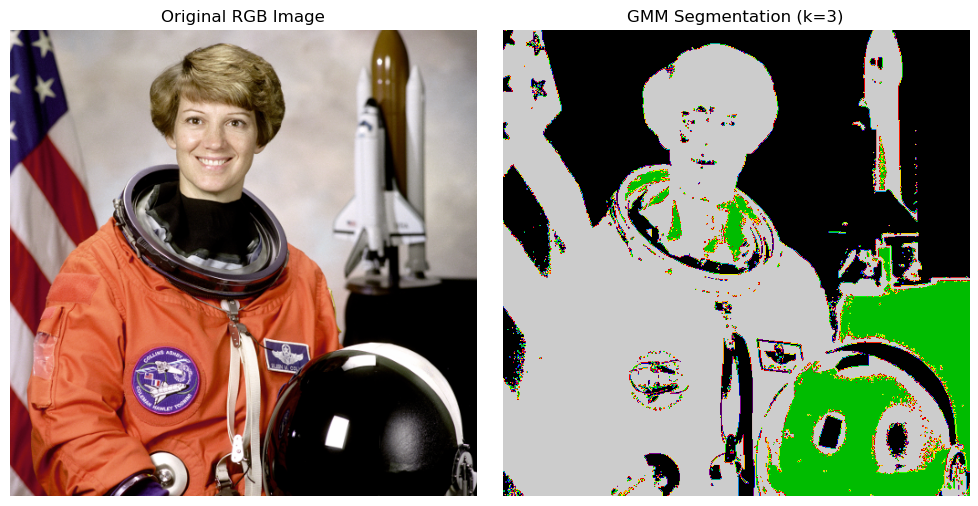

In [9]:
import skimage as sk
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Load RGB image - astronaut image since coin in greyscale
img = sk.data.astronaut()

# Reshape image as a list of RGB pixels: N x 3
v_img = img.reshape(-1, 3)  # (rows * cols, channels)

# Fit GMM model
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(v_img)

# Predict cluster for each pixel
labels = gmm.predict(v_img)

# Reshape labels back to image shape
segmented = labels.reshape(img.shape[:2])

# Visualize results
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(img)
ax0.set_title('Original RGB Image')
ax0.axis('off')

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(segmented, cmap='nipy_spectral')
ax1.set_title(f'GMM Segmentation (k={n_clusters})')
ax1.axis('off')

plt.tight_layout()
plt.show()


**Comparison: GMM vs. K-Means**

| Feature     | K-Means                        | GMM (Gaussian Mixture Model)                |
| ----------- | ------------------------------ | ------------------------------------------- |
| Assumes     | Hard spherical clusters        | Soft probabilistic (elliptical) clusters    |
| Output      | Crisp (one cluster per pixel)  | Probability-based cluster assignment        |
| Flexibility | Limited to Euclidean distances | Can model more complex distributions        |
| Performance | Faster                         | Slower but more accurate for natural RGB    |



## 10. Extract the main texture features of this image

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.feature.texture import graycomatrix, graycoprops

# Load the 'coins' image
img = data.coins()
img = img_as_ubyte(img)  # ensure it's uint8 for GLCM

# Compute Gray-Level Co-occurrence Matrix (GLCM)
glcm = graycomatrix(img,
                    distances=[1],
                    angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                    levels=256,
                    symmetric=True,
                    normed=True)

# Extract texture features from GLCM
contrast = graycoprops(glcm, 'contrast').mean()
dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
homogeneity = graycoprops(glcm, 'homogeneity').mean()
energy = graycoprops(glcm, 'energy').mean()
correlation = graycoprops(glcm, 'correlation').mean()

# Display results
print("Texture Features of 'coins' image (averaged over 4 directions):")
print(f"Contrast:       {contrast:.4f}")
print(f"Dissimilarity:  {dissimilarity:.4f}")
print(f"Homogeneity:    {homogeneity:.4f}")
print(f"Energy:         {energy:.4f}")
print(f"Correlation:    {correlation:.4f}")


Texture Features of 'coins' image (averaged over 4 directions):
Contrast:       435.0948
Dissimilarity:  10.4830
Homogeneity:    0.2040
Energy:         0.0179
Correlation:    0.9224


**Explanation of the features**

| Feature           | Interpretation                                                               |
| ----------------- | ---------------------------------------------------------------------------- |
| **Contrast**      | Difference between neighboring pixel intensities — high = sharp transitions. |
| **Dissimilarity** | Similar to contrast but more linear.                                         |
| **Homogeneity**   | Higher when gray levels are uniform.                                         |
| **Energy**        | Sum of squared elements in GLCM — high = repeated structure.                 |
| **Correlation**   | How correlated a pixel is to its neighbor — structural similarity.           |


## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

The Computer Vision course has been one of the most insightful experiences in my studies. It gave me a solid foundation in both theory and practical techniques, from segmentation and clustering to classification and deep learning. It helped me understand not just how, but why these methods work.

The professor played a key role in making the material accessible and engaging. Their clarity, structure, and openness to questions created an environment that encouraged real learning and curiosity.

I’m leaving this course more confident, inspired, and eager to continue exploring the field. Thank you for a truly impactful experience.